# Street View House Numbers (SVHN) CNN classification

In [ ]:

#Name: Asiya Hakimi
#Train a CNN on the SVHN Dataset for Classification
# email address : asiyahakimi09@gmail.com
#GitHub profile link :https://github.com/AsiyaHakimi

## SVHN


Street View House Numbers (SHVN) is a real-world image dataset that consists of images obtained from house numbers in Google street view images. The dataset can be used to automatically transcribe an address number from a geo-located patch of pixels and the associated transcribed number can be used to pinpoint the location of the building it represents.



# Project Implementation

### Import necessary libraries

In [70]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import random
import h5py
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Add setting for libraries

In [25]:

logging.disable(logging.WARNING)


%matplotlib inline


random.seed(1)

### Load the dataset

In [26]:
#Open the file
data = h5py.File('SVHN_single_grey1.h5')

#Load the training and test data
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

# Details

### Understand the data

In [27]:
X_train.shape

(42000, 32, 32)

**The training dataset has 42k images of size 32*32**

In [5]:
y_train.shape

(42000,)

**There are 42k labels that provides the correct classification for images in our training dataset**

In [6]:
X_test.shape

(18000, 32, 32)

**The test dataset has 18k images of size 32*32**

In [7]:
y_test.shape

(18000,)

**There are 18k labels that provides the correct classification for images in our test dataset**

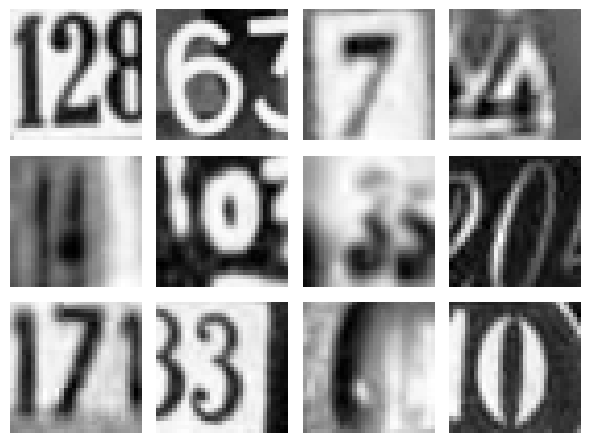

In [32]:
#set the size of the plot
plt.figure(figsize=(6,6))

for index in range(12):
  plt.subplot(4,4, index+1)
  plt.imshow(X_train[index], cmap='Greys')
  plt.axis('off')

plt.tight_layout()

#### Display the first 12 images of training dataset

# Details

In [33]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Details

In [34]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Details

In [37]:
from keras.activations import relu, softmax  # Import relu and softmax


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation=relu, input_shape=(1024, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation=relu))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation=relu))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation=relu))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation=softmax))
    return model

model = cnn_model()

# Details

In [46]:
from keras.optimizers import Adam 

In [50]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Accuracy


In [55]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss=CategoricalCrossentropy(), 
              metrics=[Accuracy()])


In [56]:

training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 6.4184e-08 - loss: 1.9394 - val_accuracy: 0.0000e+00 - val_loss: 1.1122
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 1.0997e-05 - loss: 1.1853 - val_accuracy: 3.3333e-05 - val_loss: 0.9438
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 3.6541e-05 - loss: 1.0450 - val_accuracy: 2.2222e-05 - val_loss: 0.8615
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 1.3724e-04 - loss: 0.9567 - val_accuracy: 2.7778e-05 - val_loss: 0.8316
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 1.1491e-04 - loss: 0.9249 - val_accuracy: 2.7778e-05 - val_loss: 0.7858
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 46ms/step - accuracy: 1.5490e-04 - loss: 0.8686 - val_accuracy: 2.2222e-05 - val_loss: 0.7606
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 3.1958e-04 - loss: 0.8340 - val_accuracy: 2.4444e-04 - val_loss: 0.7623
Epoch 8/10
1313/1313

# Details

In [59]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])

#print(Loss:, scores[0])
print("Accuracy:", scores[1])


Loss: 0.7425722479820251
Accuracy: 0.0003722220135387033


# Details

In [ ]:
1. scores = model.evaluate(X_test, y_test, verbose=0) evaluates the trained model on the test dataset:
   - X_test and y_test are the test features and labels, respectively.
   - The evaluate method computes the loss and specified metrics (accuracy in this case) on the test data.
   - verbose=0 suppresses the output, so it won’t print progress information during evaluation.

2. print(Loss:, scores[0]) prints the loss value obtained from the evaluation:
   - scores[0] corresponds to the first element of the scores array, which is the loss value.

3. print(Accuracy:, scores[1]) prints the accuracy value obtained from the evaluation:
   - scores[1] corresponds to the second element of the scores array, which is the accuracy.


# Details

In [ ]:
#https://github.com/AsiyaHakimi